# Primero vamos a realizar un estudio de correlación de las variables

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [2]:
# Cargar el dataset desde un archivo CSV
df = pd.read_csv('./jugadoresFantasyActualizado.csv')

In [3]:
# Eliminar la columna 'Name'
df = df.drop(columns=['Name', 'Team', 'Jornada'])a

# Convertir la columna 'Status' a un formato numérico
df['posicion'] = df['posicion'].astype('category').cat.codes

# Convertir la columna 'Status' a un formato numérico
df['status'] = df['status'].astype('category').cat.codes

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Imprimir la correlación con la columna 'Price'
print(correlation_matrix['puntos_Jornada'])

# Generar el array con los 5 mejores pesos de correlación en relación al precio
top_5_correlations = correlation_matrix.nlargest(6, 'puntos_Jornada')
print(top_5_correlations.index.tolist())

# Atributos con correlación por encima de 0
above_zero = correlation_matrix[correlation_matrix > 0]
above_zero_attributes = above_zero.index.tolist()
print(above_zero_attributes)

# Atributos con correlación por encima de 0.3
above_point_three = correlation_matrix[correlation_matrix > 0.3]
above_point_three_attributes = above_point_three.index.tolist()
print(above_point_three_attributes)

ID                 -0.043810
posicion            0.079664
puntos_Jornada      1.000000
AS                  0.726432
puntos_AS           0.748825
MARCA               0.702992
puntos_MARCA        0.714566
MD                  0.717825
puntos_MD           0.737027
SOFASCORE           0.606871
puntos_SOFASCORE    0.755051
puntos_Goles        0.682310
puntos_Penaltis     0.201830
puntos_Amarillas    0.126122
puntos_Rojas        0.270894
status                   NaN
Name: puntos_Jornada, dtype: float64
['puntos_Jornada', 'puntos_SOFASCORE', 'puntos_AS', 'puntos_MD', 'AS', 'MD']
['ID', 'posicion', 'puntos_Jornada', 'AS', 'puntos_AS', 'MARCA', 'puntos_MARCA', 'MD', 'puntos_MD', 'SOFASCORE', 'puntos_SOFASCORE', 'puntos_Goles', 'puntos_Penaltis', 'puntos_Amarillas', 'puntos_Rojas', 'status']
['ID', 'posicion', 'puntos_Jornada', 'AS', 'puntos_AS', 'MARCA', 'puntos_MARCA', 'MD', 'puntos_MD', 'SOFASCORE', 'puntos_SOFASCORE', 'puntos_Goles', 'puntos_Penaltis', 'puntos_Amarillas', 'puntos_Rojas', 'sta

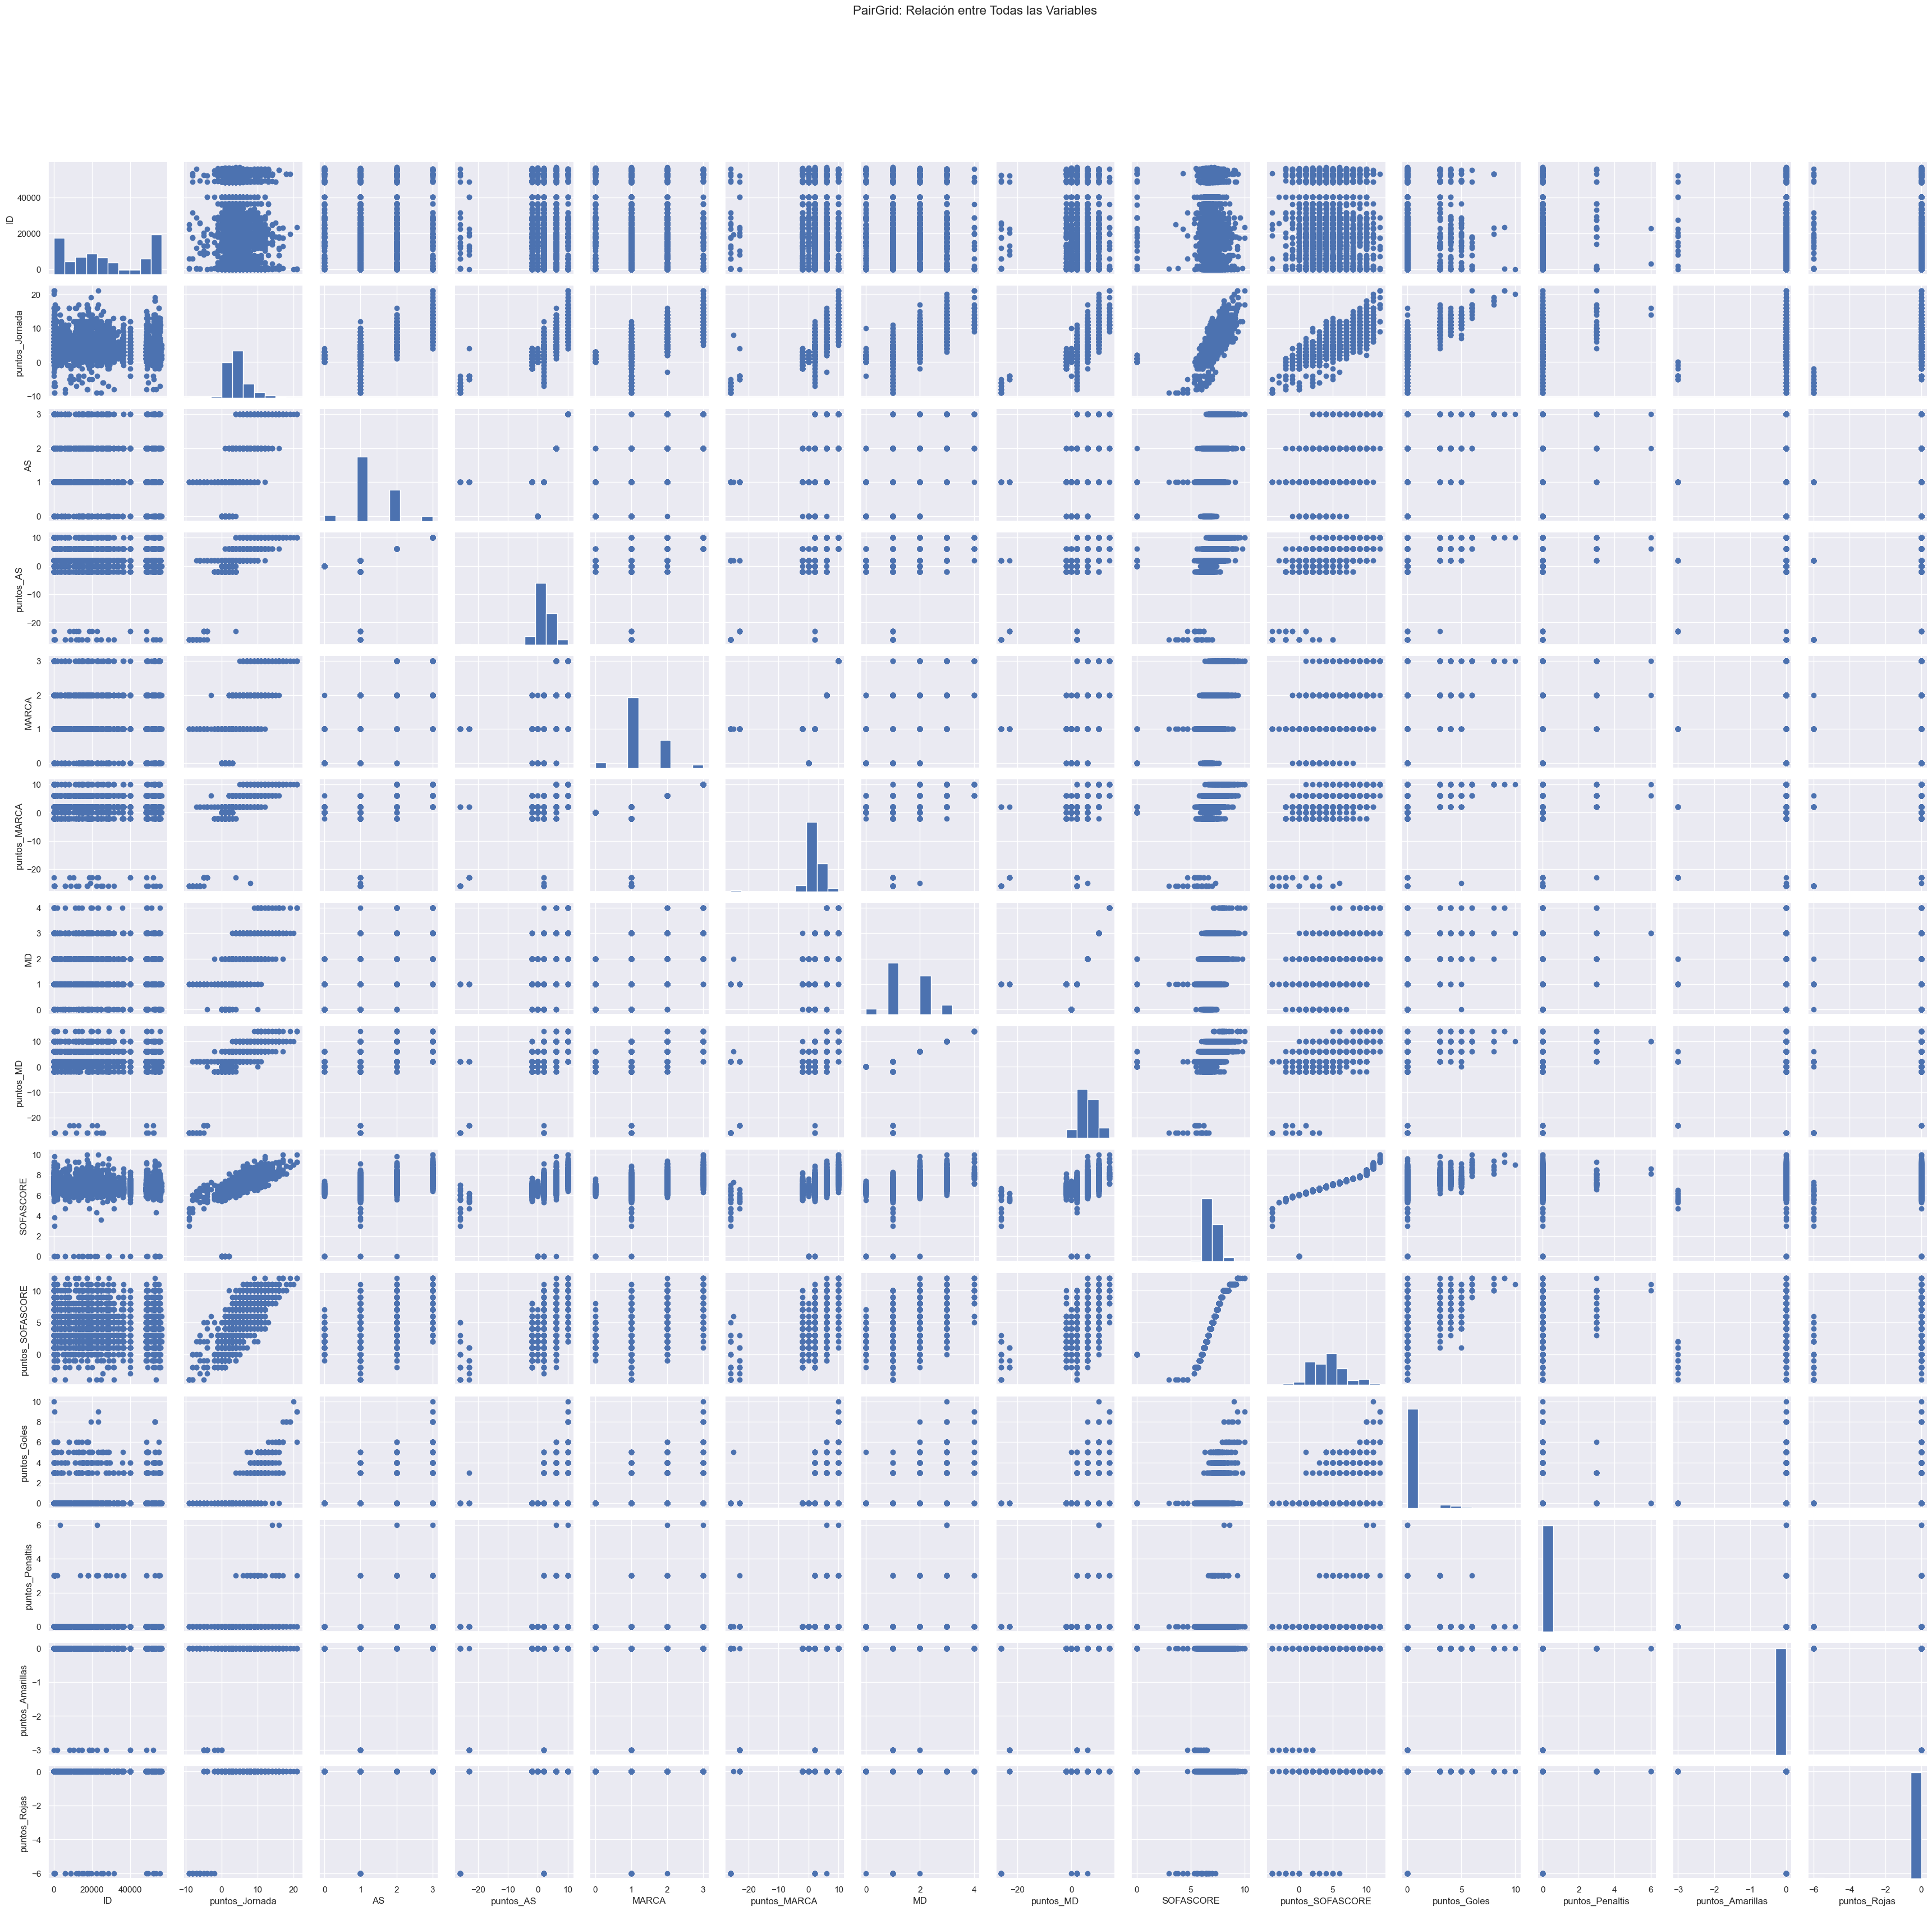

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset desde un archivo CSV
data = pd.read_csv('./jugadoresFantasyActualizado.csv')

# Crea un PairGrid
sns.set_theme()
g = sns.PairGrid(data)

# Mapa de scatter plots en la diagonal principal
g.map_diag(plt.hist)

# Mapa de scatter plots fuera de la diagonal principal
g.map_offdiag(plt.scatter)

# Ajusta el diseño
plt.subplots_adjust(top=0.9)
g.fig.suptitle('PairGrid: Relación entre Todas las Variables', fontsize=16)

# Muestra el gráfico
plt.show()

# KNN

Error Cuadrático Medio Medio del modelo es: 0.23274359688195992
Error Cuadrático Medio del modelo con los datos de prueba es: 0.2932050711743772
Coeficiente de Determinación (R2) del modelo es: 0.9668305091271824


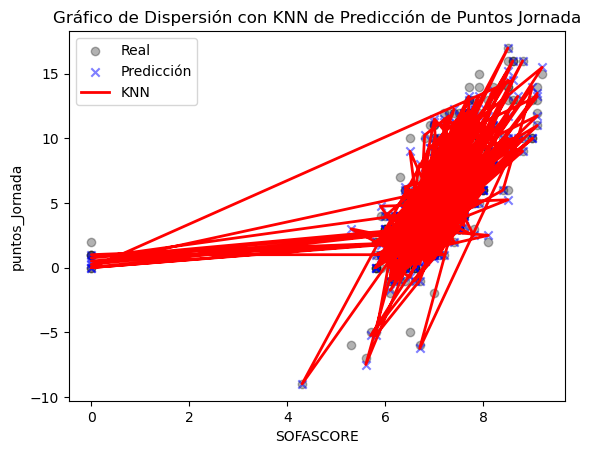

Modelo guardado como modelo_knn.joblib
Ejemplo de prediccion:
10
11
3


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib  # Importar la biblioteca joblib

# Eliminar filas con valores nulos
df = df.dropna()

# Seleccionar los atributos con mayor correlación
selected_features = ['SOFASCORE', 'puntos_SOFASCORE', 'AS', 'puntos_AS', 'MD', 'puntos_MD', 'MARCA', 'puntos_MARCA', 'puntos_Goles']
X = df[selected_features]
y = df['puntos_Jornada']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear el modelo KNN para regresión
knn_model = KNeighborsRegressor(n_neighbors=4)  # Puedes ajustar el número de vecinos según sea necesario

# Realizar Cross-Validation para evaluar el rendimiento del modelo
scores = cross_val_score(knn_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Calcular el error cuadrático medio medio del modelo
mse = -np.mean(scores)

# Entrenar el modelo con los datos de entrenamiento
knn_model.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred = knn_model.predict(X_test)

# Calcular el error cuadrático medio del modelo con los datos de prueba
mse_test = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)

# Imprimir el error cuadrático medio medio y el R2 del modelo
print('Error Cuadrático Medio Medio del modelo es:', mse)
print('Error Cuadrático Medio del modelo con los datos de prueba es:', mse_test)
print('Coeficiente de Determinación (R2) del modelo es:', r2)

# Generar el gráfico de dispersión con puntos de predicción
plt.scatter(X_test['SOFASCORE'], y_test, color='black', label='Real', alpha=0.3)
plt.scatter(X_test['SOFASCORE'], y_pred, color='blue', label='Predicción', marker='x', alpha=0.5)
plt.plot(X_test['SOFASCORE'], knn_model.predict(X_test), color='red', linewidth=2, label='KNN')
plt.xlabel('SOFASCORE')
plt.ylabel('puntos_Jornada')
plt.title('Gráfico de Dispersión con KNN de Predicción de Puntos Jornada')
plt.legend()
plt.show()

# Guardar el modelo en un archivo
model_filename = 'modelo_knn.joblib'
joblib.dump(knn_model, model_filename)
print(f'Modelo guardado como {model_filename}')

# Convertir los datos de predicción a un DataFrame
datos = pd.DataFrame({'SOFASCORE': [8.8, 7.7, 7.5], 'puntos_SOFASCORE': [11, 8, 7], 'AS': [2, 3, 1], 'puntos_AS': [6, 10, 2], 'MD': [2, 2, 1], 'puntos_MD': [6, 6, 2], 'MARCA': [2, 2, 1], 'puntos_MARCA': [6, 6, 2], 'puntos_Goles': [4, 4, 0]})

print("Ejemplo de prediccion:")

def hacer_prediccion(datos):
    # Realizar predicciones usando el modelo entrenado
    predicciones = knn_model.predict(datos)
    for prediccion in predicciones:
        print(int(prediccion))

# Llamar a la función de predicción
hacer_prediccion(datos)

Error Cuadrático Medio Medio del modelo es: 0.9893685034518634
Error Cuadrático Medio del modelo con los datos de prueba es: 1.1766649720386375
Coeficiente de Determinación (R2) del modelo es: 0.8668870975045725


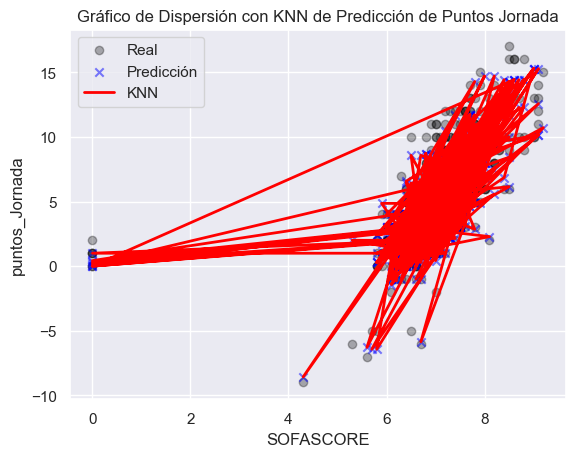

Ejemplo de prediccion:
14


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Eliminar filas con valores nulos
df = df.dropna()

# Seleccionar los atributos con mayor correlación
selected_features = ['SOFASCORE', 'puntos_SOFASCORE', 'AS', 'puntos_AS', 'MD', 'puntos_MD', 'MARCA', 'puntos_MARCA']
X = df[selected_features]
y = df['puntos_Jornada']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear el modelo KNN para regresión
knn_model = KNeighborsRegressor(n_neighbors=7)  # Puedes ajustar el número de vecinos según sea necesario

# Realizar Cross-Validation para evaluar el rendimiento del modelo
scores = cross_val_score(knn_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Calcular el error cuadrático medio medio del modelo
mse = -np.mean(scores)

# Entrenar el modelo con los datos de entrenamiento
knn_model.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred = knn_model.predict(X_test)

# Calcular el error cuadrático medio del modelo con los datos de prueba
mse_test = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)

# Imprimir el error cuadrático medio medio y el R2 del modelo
print('Error Cuadrático Medio Medio del modelo es:', mse)
print('Error Cuadrático Medio del modelo con los datos de prueba es:', mse_test)
print('Coeficiente de Determinación (R2) del modelo es:', r2)

# Generar el gráfico de dispersión con puntos de predicción
plt.scatter(X_test['SOFASCORE'], y_test, color='black', label='Real', alpha=0.3)
plt.scatter(X_test['SOFASCORE'], y_pred, color='blue', label='Predicción', marker='x', alpha=0.5)
plt.plot(X_test['SOFASCORE'], knn_model.predict(X_test), color='red', linewidth=2, label='KNN')
plt.xlabel('SOFASCORE')
plt.ylabel('puntos_Jornada')
plt.title('Gráfico de Dispersión con KNN de Predicción de Puntos Jornada')
plt.legend()
plt.show()

# Convertir los datos de predicción a un DataFrame
datos = pd.DataFrame({'SOFASCORE': [8.4], 'puntos_SOFASCORE': [10], 'AS': [3], 'puntos_AS': [10], 'MD': [3], 'puntos_MD': [10], 'MARCA': [3], 'puntos_MARCA': [10]})

print("Ejemplo de prediccion:")

def hacer_prediccion(datos):
    # Realizar predicciones usando el modelo entrenado
    predicciones = knn_model.predict(datos)
    print(int(predicciones))

# Llamar a la función de predicción
hacer_prediccion(datos)

# Regresion lineal

Error Cuadrático Medio Medio del modelo es: 0.3099145009621934
Error Cuadrático Medio del modelo con los datos de prueba es: 0.3447572627397606
Coeficiente de Determinación (R2) del modelo es: 0.9609985501479165


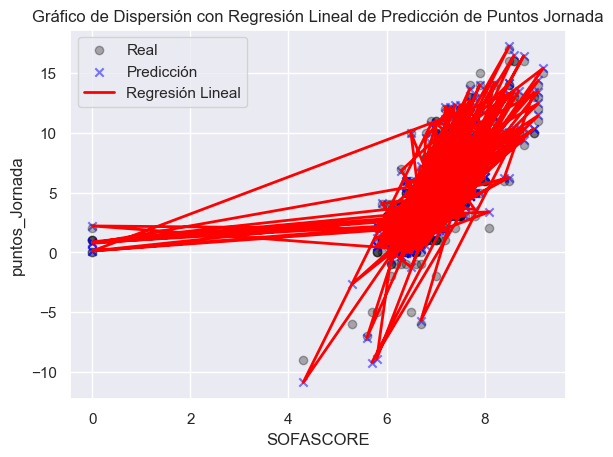

Ejemplo de prediccion:
14


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Eliminar filas con valores nulos
df = df.dropna()

# Seleccionar los atributos con mayor correlación
selected_features = ['SOFASCORE', 'puntos_SOFASCORE', 'AS', 'puntos_AS', 'MD', 'puntos_MD', 'MARCA', 'puntos_MARCA', 'puntos_Goles']
X = df[selected_features]
y = df['puntos_Jornada']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear el modelo de Regresión Lineal
model = LinearRegression()

# Realizar Cross-Validation para evaluar el rendimiento del modelo
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Calcular el error cuadrático medio medio del modelo
mse = -np.mean(scores)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio del modelo con los datos de prueba
mse_test = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)

# Imprimir el error cuadrático medio medio y el R2 del modelo
print('Error Cuadrático Medio Medio del modelo es:', mse)
print('Error Cuadrático Medio del modelo con los datos de prueba es:', mse_test)
print('Coeficiente de Determinación (R2) del modelo es:', r2)

# Generar el gráfico de dispersión con puntos de predicción
plt.scatter(X_test['SOFASCORE'], y_test, color='black', label='Real', alpha=0.3)
plt.scatter(X_test['SOFASCORE'], y_pred, color='blue', label='Predicción', marker='x', alpha=0.5)
plt.plot(X_test['SOFASCORE'], model.predict(X_test), color='red', linewidth=2, label='Regresión Lineal')
plt.xlabel('SOFASCORE')
plt.ylabel('puntos_Jornada')
plt.title('Gráfico de Dispersión con Regresión Lineal de Predicción de Puntos Jornada')
plt.legend()
plt.show()

# Convertir los datos de predicción a un DataFrame
datos = pd.DataFrame({'SOFASCORE': [8.4], 'puntos_SOFASCORE': [10], 'AS': [3], 'puntos_AS': [10], 'MD': [3], 'puntos_MD': [10], 'MARCA': [3], 'puntos_MARCA': [10], 'puntos_Goles': [4]})

print("Ejemplo de prediccion:")

def hacer_prediccion(datos):
    # Realizar predicciones usando el modelo entrenado
    predicciones = model.predict(datos)
    print(int(predicciones))

# Llamar a la función de predicción
hacer_prediccion(datos)

Error Cuadrático Medio Medio del modelo es: 1.188287830371824
Error Cuadrático Medio del modelo con los datos de prueba es: 1.1632789059350734
Coeficiente de Determinación (R2) del modelo es: 0.8684014266929003


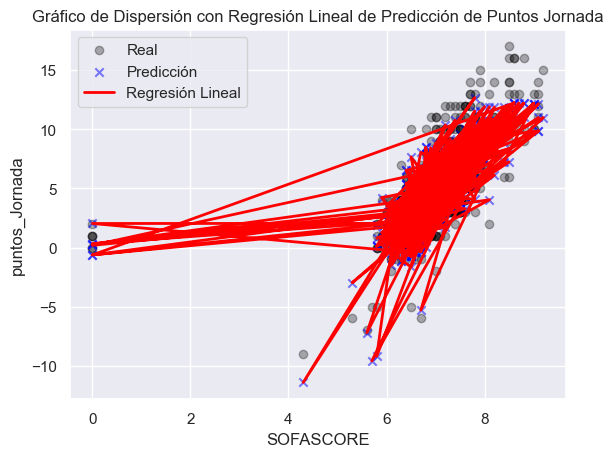

Ejemplo de prediccion:
11


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Eliminar filas con valores nulos
df = df.dropna()

# Seleccionar los atributos con mayor correlación
selected_features = ['SOFASCORE', 'puntos_SOFASCORE', 'AS', 'puntos_AS', 'MD', 'puntos_MD', 'MARCA', 'puntos_MARCA']
X = df[selected_features]
y = df['puntos_Jornada']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear el modelo de Regresión Lineal
model = LinearRegression()

# Realizar Cross-Validation para evaluar el rendimiento del modelo
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Calcular el error cuadrático medio medio del modelo
mse = -np.mean(scores)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio del modelo con los datos de prueba
mse_test = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)

# Imprimir el error cuadrático medio medio y el R2 del modelo
print('Error Cuadrático Medio Medio del modelo es:', mse)
print('Error Cuadrático Medio del modelo con los datos de prueba es:', mse_test)
print('Coeficiente de Determinación (R2) del modelo es:', r2)

# Generar el gráfico de dispersión con puntos de predicción
plt.scatter(X_test['SOFASCORE'], y_test, color='black', label='Real', alpha=0.3)
plt.scatter(X_test['SOFASCORE'], y_pred, color='blue', label='Predicción', marker='x', alpha=0.5)
plt.plot(X_test['SOFASCORE'], model.predict(X_test), color='red', linewidth=2, label='Regresión Lineal')
plt.xlabel('SOFASCORE')
plt.ylabel('puntos_Jornada')
plt.title('Gráfico de Dispersión con Regresión Lineal de Predicción de Puntos Jornada')
plt.legend()
plt.show()

# Convertir los datos de predicción a un DataFrame
datos = pd.DataFrame({'SOFASCORE': [8.4], 'puntos_SOFASCORE': [10], 'AS': [3], 'puntos_AS': [10], 'MD': [3], 'puntos_MD': [10], 'MARCA': [3], 'puntos_MARCA': [10]})

print("Ejemplo de prediccion:")

def hacer_prediccion(datos):
    # Realizar predicciones usando el modelo entrenado
    predicciones = model.predict(datos)
    print(int(predicciones))

# Llamar a la función de predicción
hacer_prediccion(datos)

# Arbol de decision

Error Cuadrático Medio Medio del modelo es: 0.23426740216385702
Error Cuadrático Medio del modelo con los datos de prueba es: 0.19521902287816725
Coeficiente de Determinación (R2) del modelo es: 0.9779154038106432


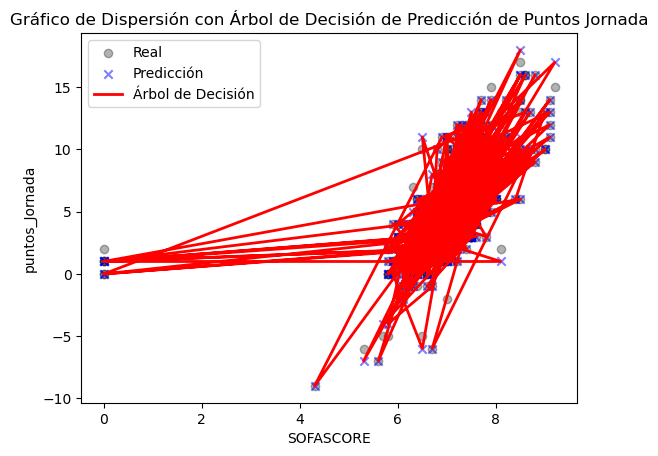

Ejemplo de prediccion:
14


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Eliminar filas con valores nulos
df = df.dropna()

# Seleccionar los atributos con mayor correlación
selected_features = ['SOFASCORE', 'puntos_SOFASCORE', 'AS', 'puntos_AS', 'MD', 'puntos_MD', 'MARCA', 'puntos_MARCA', 'puntos_Goles']
X = df[selected_features]
y = df['puntos_Jornada']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear el modelo de árbol de decisión para regresión
tree_model = DecisionTreeRegressor(random_state=0)

# Realizar Cross-Validation para evaluar el rendimiento del modelo
scores = cross_val_score(tree_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Calcular el error cuadrático medio medio del modelo
mse = -np.mean(scores)

# Entrenar el modelo con los datos de entrenamiento
tree_model.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred = tree_model.predict(X_test)

# Calcular el error cuadrático medio del modelo con los datos de prueba
mse_test = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)

# Imprimir el error cuadrático medio medio y el R2 del modelo
print('Error Cuadrático Medio Medio del modelo es:', mse)
print('Error Cuadrático Medio del modelo con los datos de prueba es:', mse_test)
print('Coeficiente de Determinación (R2) del modelo es:', r2)

# Generar el gráfico de dispersión con puntos de predicción
plt.scatter(X_test['SOFASCORE'], y_test, color='black', label='Real', alpha=0.3)
plt.scatter(X_test['SOFASCORE'], y_pred, color='blue', label='Predicción', marker='x', alpha=0.5)
plt.plot(X_test['SOFASCORE'], tree_model.predict(X_test), color='red', linewidth=2, label='Árbol de Decisión')
plt.xlabel('SOFASCORE')
plt.ylabel('puntos_Jornada')
plt.title('Gráfico de Dispersión con Árbol de Decisión de Predicción de Puntos Jornada')
plt.legend()
plt.show()

# Convertir los datos de predicción a un DataFrame
datos = pd.DataFrame({'SOFASCORE': [8.4], 'puntos_SOFASCORE': [10], 'AS': [3], 'puntos_AS': [10], 'MD': [3], 'puntos_MD': [10], 'MARCA': [3], 'puntos_MARCA': [10], 'puntos_Goles': [4]})

print("Ejemplo de prediccion:")

def hacer_prediccion(datos):
    # Realizar predicciones usando el modelo entrenado
    predicciones = tree_model.predict(datos)
    print(int(predicciones))

# Llamar a la función de predicción
hacer_prediccion(datos)

Error Cuadrático Medio Medio del modelo es: 1.1523760838449417
Error Cuadrático Medio del modelo con los datos de prueba es: 1.2416880746591044
Coeficiente de Determinación (R2) del modelo es: 0.859531211058771


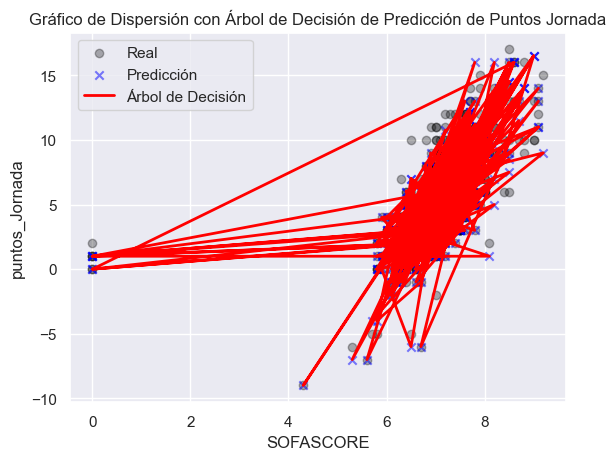

Ejemplo de prediccion:
14


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Eliminar filas con valores nulos
df = df.dropna()

# Seleccionar los atributos con mayor correlación
selected_features = ['SOFASCORE', 'puntos_SOFASCORE', 'AS', 'puntos_AS', 'MD', 'puntos_MD', 'MARCA', 'puntos_MARCA']
X = df[selected_features]
y = df['puntos_Jornada']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear el modelo de árbol de decisión para regresión
tree_model = DecisionTreeRegressor(random_state=0)

# Realizar Cross-Validation para evaluar el rendimiento del modelo
scores = cross_val_score(tree_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Calcular el error cuadrático medio medio del modelo
mse = -np.mean(scores)

# Entrenar el modelo con los datos de entrenamiento
tree_model.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred = tree_model.predict(X_test)

# Calcular el error cuadrático medio del modelo con los datos de prueba
mse_test = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)

# Imprimir el error cuadrático medio medio y el R2 del modelo
print('Error Cuadrático Medio Medio del modelo es:', mse)
print('Error Cuadrático Medio del modelo con los datos de prueba es:', mse_test)
print('Coeficiente de Determinación (R2) del modelo es:', r2)

# Generar el gráfico de dispersión con puntos de predicción
plt.scatter(X_test['SOFASCORE'], y_test, color='black', label='Real', alpha=0.3)
plt.scatter(X_test['SOFASCORE'], y_pred, color='blue', label='Predicción', marker='x', alpha=0.5)
plt.plot(X_test['SOFASCORE'], y_pred, color='red', linewidth=2, label='Árbol de Decisión')
plt.xlabel('SOFASCORE')
plt.ylabel('puntos_Jornada')
plt.title('Gráfico de Dispersión con Árbol de Decisión de Predicción de Puntos Jornada')
plt.legend()
plt.show()

# Convertir los datos de predicción a un DataFrame
datos = pd.DataFrame({'SOFASCORE': [8.4], 'puntos_SOFASCORE': [10], 'AS': [3], 'puntos_AS': [10], 'MD': [3], 'puntos_MD': [10], 'MARCA': [3], 'puntos_MARCA': [10]})

print("Ejemplo de prediccion:")

def hacer_prediccion(datos):
    # Realizar predicciones usando el modelo entrenado
    predicciones = tree_model.predict(datos)
    print(int(predicciones))

# Llamar a la función de predicción
hacer_prediccion(datos)

#  SVM

Error Cuadrático Medio Medio del modelo es: 1.7303935262618926
Error Cuadrático Medio del modelo con los datos de prueba es: 1.5547846686355908
Coeficiente de Determinación (R2) del modelo es: 0.8241114464052567


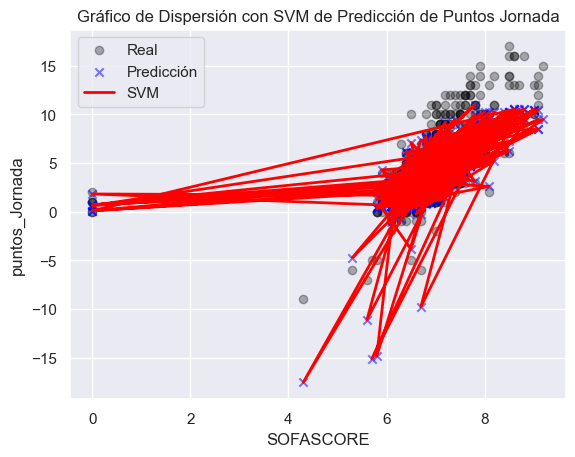

Ejemplo de prediccion:
10


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Eliminar filas con valores nulos
df = df.dropna()

# Seleccionar los atributos con mayor correlación
selected_features = ['SOFASCORE', 'puntos_SOFASCORE', 'AS', 'puntos_AS', 'MD', 'puntos_MD', 'MARCA', 'puntos_MARCA']
X = df[selected_features]
y = df['puntos_Jornada']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear el modelo SVM para regresión
svm_model = SVR(kernel='linear')  # Puedes ajustar el kernel según sea necesario

# Realizar Cross-Validation para evaluar el rendimiento del modelo
scores = cross_val_score(svm_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Calcular el error cuadrático medio medio del modelo
mse = -np.mean(scores)

# Entrenar el modelo con los datos de entrenamiento
svm_model.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred = svm_model.predict(X_test)

# Calcular el error cuadrático medio del modelo con los datos de prueba
mse_test = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)

# Imprimir el error cuadrático medio medio y el R2 del modelo
print('Error Cuadrático Medio Medio del modelo es:', mse)
print('Error Cuadrático Medio del modelo con los datos de prueba es:', mse_test)
print('Coeficiente de Determinación (R2) del modelo es:', r2)

# Generar el gráfico de dispersión con puntos de predicción
plt.scatter(X_test['SOFASCORE'], y_test, color='black', label='Real', alpha=0.3)
plt.scatter(X_test['SOFASCORE'], y_pred, color='blue', label='Predicción', marker='x', alpha=0.5)
plt.plot(X_test['SOFASCORE'], svm_model.predict(X_test), color='red', linewidth=2, label='SVM')
plt.xlabel('SOFASCORE')
plt.ylabel('puntos_Jornada')
plt.title('Gráfico de Dispersión con SVM de Predicción de Puntos Jornada')
plt.legend()
plt.show()

# Convertir los datos de predicción a un DataFrame
datos = pd.DataFrame({'SOFASCORE': [8.4], 'puntos_SOFASCORE': [10], 'AS': [3], 'puntos_AS': [10], 'MD': [3], 'puntos_MD': [10], 'MARCA': [3], 'puntos_MARCA': [10]})

print("Ejemplo de prediccion:")

def hacer_prediccion(datos):
    # Realizar predicciones usando el modelo entrenado
    predicciones = svm_model.predict(datos)
    print(int(predicciones))

# Llamar a la función de predicción
hacer_prediccion(datos)

Error Cuadrático Medio Medio del modelo es: 0.5469047634946647
Error Cuadrático Medio del modelo con los datos de prueba es: 0.4911340004956687
Coeficiente de Determinación (R2) del modelo es: 0.9444393486049805


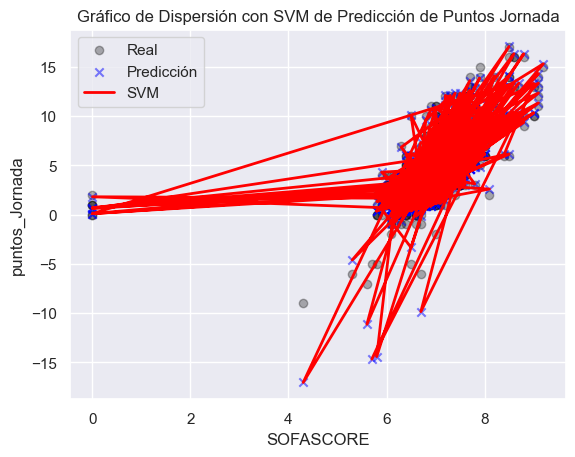

Ejemplo de prediccion:
14


In [94]:
# Eliminar filas con valores nulos
df = df.dropna()

# Seleccionar los atributos con mayor correlación
selected_features = ['SOFASCORE', 'puntos_SOFASCORE', 'AS', 'puntos_AS', 'MD', 'puntos_MD', 'MARCA', 'puntos_MARCA', 'puntos_Goles']
X = df[selected_features]
y = df['puntos_Jornada']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear el modelo SVM para regresión
svm_model = SVR(kernel='linear')  # Puedes ajustar el kernel según sea necesario

# Realizar Cross-Validation para evaluar el rendimiento del modelo
scores = cross_val_score(svm_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Calcular el error cuadrático medio medio del modelo
mse = -np.mean(scores)

# Entrenar el modelo con los datos de entrenamiento
svm_model.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred = svm_model.predict(X_test)

# Calcular el error cuadrático medio del modelo con los datos de prueba
mse_test = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)

# Imprimir el error cuadrático medio medio y el R2 del modelo
print('Error Cuadrático Medio Medio del modelo es:', mse)
print('Error Cuadrático Medio del modelo con los datos de prueba es:', mse_test)
print('Coeficiente de Determinación (R2) del modelo es:', r2)

# Generar el gráfico de dispersión con puntos de predicción
plt.scatter(X_test['SOFASCORE'], y_test, color='black', label='Real', alpha=0.3)
plt.scatter(X_test['SOFASCORE'], y_pred, color='blue', label='Predicción', marker='x', alpha=0.5)
plt.plot(X_test['SOFASCORE'], svm_model.predict(X_test), color='red', linewidth=2, label='SVM')
plt.xlabel('SOFASCORE')
plt.ylabel('puntos_Jornada')
plt.title('Gráfico de Dispersión con SVM de Predicción de Puntos Jornada')
plt.legend()
plt.show()

# Convertir los datos de predicción a un DataFrame
datos = pd.DataFrame({'SOFASCORE': [8.4], 'puntos_SOFASCORE': [10], 'AS': [3], 'puntos_AS': [10], 'MD': [3], 'puntos_MD': [10], 'MARCA': [3], 'puntos_MARCA': [10], 'puntos_Goles': [4]})

print("Ejemplo de prediccion:")

def hacer_prediccion(datos):
    # Realizar predicciones usando el modelo entrenado
    predicciones = svm_model.predict(datos)
    print(int(predicciones))

# Llamar a la función de predicción
hacer_prediccion(datos)

#  Redes neuronales

Error Cuadrático Medio Medio del modelo es: 0.9372810181036453
Error Cuadrático Medio del modelo con los datos de prueba es: 1.1095962554595973
Coeficiente de Determinación (R2) del modelo es: 0.8744743986842884


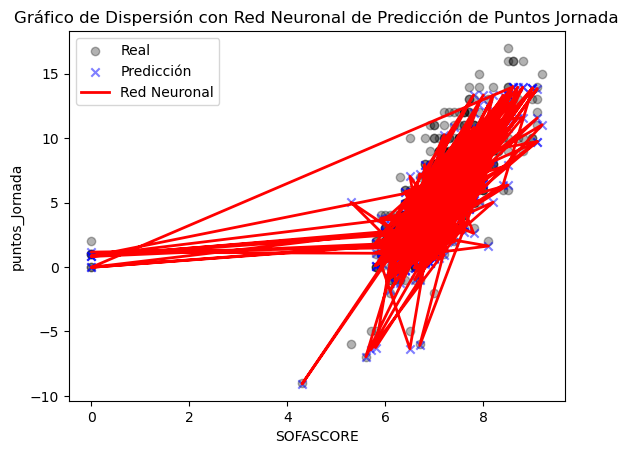

Ejemplo de prediccion:
13


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Eliminar filas con valores nulos
df = df.dropna()

# Seleccionar los atributos con mayor correlación
selected_features = ['SOFASCORE', 'puntos_SOFASCORE', 'AS', 'puntos_AS', 'MD', 'puntos_MD', 'MARCA', 'puntos_MARCA']
X = df[selected_features]
y = df['puntos_Jornada']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear el modelo de Red Neuronal
# Puedes ajustar los parámetros según sea necesario
model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=0)

# Realizar Cross-Validation para evaluar el rendimiento del modelo
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Calcular el error cuadrático medio medio del modelo
mse = -np.mean(scores)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio del modelo con los datos de prueba
mse_test = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)

# Imprimir el error cuadrático medio medio y el R2 del modelo
print('Error Cuadrático Medio Medio del modelo es:', mse)
print('Error Cuadrático Medio del modelo con los datos de prueba es:', mse_test)
print('Coeficiente de Determinación (R2) del modelo es:', r2)

# Generar el gráfico de dispersión con puntos de predicción
plt.scatter(X_test['SOFASCORE'], y_test, color='black', label='Real', alpha=0.3)
plt.scatter(X_test['SOFASCORE'], y_pred, color='blue', label='Predicción', marker='x', alpha=0.5)
plt.plot(X_test['SOFASCORE'], y_pred, color='red', linewidth=2, label='Red Neuronal')
plt.xlabel('SOFASCORE')
plt.ylabel('puntos_Jornada')
plt.title('Gráfico de Dispersión con Red Neuronal de Predicción de Puntos Jornada')
plt.legend()
plt.show()

# Convertir los datos de predicción a un DataFrame
datos = pd.DataFrame({'SOFASCORE': [8.4], 'puntos_SOFASCORE': [10], 'AS': [3], 'puntos_AS': [10], 'MD': [3], 'puntos_MD': [10], 'MARCA': [3], 'puntos_MARCA': [10]})

print("Ejemplo de prediccion:")

def hacer_prediccion(datos):
    # Realizar predicciones usando el modelo entrenado
    predicciones = model.predict(datos)
    print(int(predicciones))

# Llamar a la función de predicción
hacer_prediccion(datos)

Error Cuadrático Medio Medio del modelo es: 0.19136056357737158
Error Cuadrático Medio del modelo con los datos de prueba es: 0.2398154863273745
Coeficiente de Determinación (R2) del modelo es: 0.9728703274024706


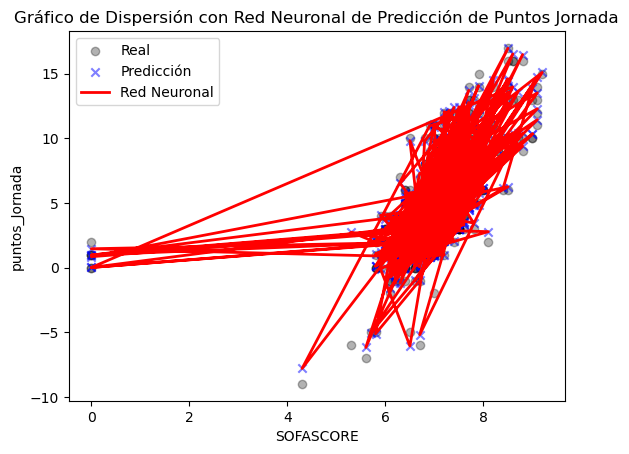

Ejemplo de prediccion:
14


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Eliminar filas con valores nulos
df = df.dropna()

# Seleccionar los atributos con mayor correlación
selected_features = ['SOFASCORE', 'puntos_SOFASCORE', 'AS', 'puntos_AS', 'MD', 'puntos_MD', 'MARCA', 'puntos_MARCA', 'puntos_Goles']
X = df[selected_features]
y = df['puntos_Jornada']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear el modelo de Red Neuronal
# Puedes ajustar los parámetros según sea necesario
model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=0)

# Realizar Cross-Validation para evaluar el rendimiento del modelo
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Calcular el error cuadrático medio medio del modelo
mse = -np.mean(scores)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio del modelo con los datos de prueba
mse_test = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)

# Imprimir el error cuadrático medio medio y el R2 del modelo
print('Error Cuadrático Medio Medio del modelo es:', mse)
print('Error Cuadrático Medio del modelo con los datos de prueba es:', mse_test)
print('Coeficiente de Determinación (R2) del modelo es:', r2)

# Generar el gráfico de dispersión con puntos de predicción
plt.scatter(X_test['SOFASCORE'], y_test, color='black', label='Real', alpha=0.3)
plt.scatter(X_test['SOFASCORE'], y_pred, color='blue', label='Predicción', marker='x', alpha=0.5)
plt.plot(X_test['SOFASCORE'], y_pred, color='red', linewidth=2, label='Red Neuronal')
plt.xlabel('SOFASCORE')
plt.ylabel('puntos_Jornada')
plt.title('Gráfico de Dispersión con Red Neuronal de Predicción de Puntos Jornada')
plt.legend()
plt.show()

# Convertir los datos de predicción a un DataFrame
datos = pd.DataFrame({'SOFASCORE': [8.4], 'puntos_SOFASCORE': [10], 'AS': [3], 'puntos_AS': [10], 'MD': [3], 'puntos_MD': [10], 'MARCA': [3], 'puntos_MARCA': [10], 'puntos_Goles': [4]})

print("Ejemplo de prediccion:")

def hacer_prediccion(datos):
    # Realizar predicciones usando el modelo entrenado
    predicciones = model.predict(datos)
    print(int(predicciones))

# Llamar a la función de predicción
hacer_prediccion(datos)

#  Regresión Bayesianas

Error Cuadrático Medio Medio del modelo es: 1.1882090571832173
Error Cuadrático Medio del modelo con los datos de prueba es: 1.1631794524139436
Coeficiente de Determinación (R2) del modelo es: 0.8684126775987874


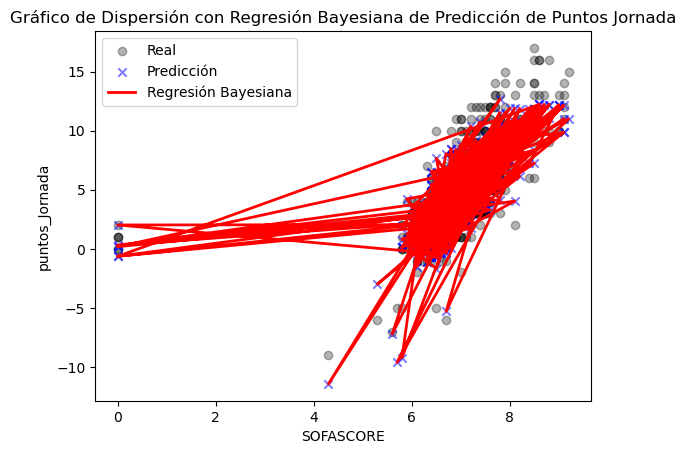

Ejemplo de prediccion:
11


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score

# Eliminar filas con valores nulos
df = df.dropna()

# Seleccionar los atributos con mayor correlación
selected_features = ['SOFASCORE', 'puntos_SOFASCORE', 'AS', 'puntos_AS', 'MD', 'puntos_MD', 'MARCA', 'puntos_MARCA']
X = df[selected_features]
y = df['puntos_Jornada']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear el modelo de Regresión Bayesiana
model = BayesianRidge()

# Realizar Cross-Validation para evaluar el rendimiento del modelo
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Calcular el error cuadrático medio medio del modelo
mse = -np.mean(scores)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio del modelo con los datos de prueba
mse_test = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)

# Imprimir el error cuadrático medio medio y el R2 del modelo
print('Error Cuadrático Medio Medio del modelo es:', mse)
print('Error Cuadrático Medio del modelo con los datos de prueba es:', mse_test)
print('Coeficiente de Determinación (R2) del modelo es:', r2)

# Generar el gráfico de dispersión con puntos de predicción
plt.scatter(X_test['SOFASCORE'], y_test, color='black', label='Real', alpha=0.3)
plt.scatter(X_test['SOFASCORE'], y_pred, color='blue', label='Predicción', marker='x', alpha=0.5)
plt.plot(X_test['SOFASCORE'], model.predict(X_test), color='red', linewidth=2, label='Regresión Bayesiana')
plt.xlabel('SOFASCORE')
plt.ylabel('puntos_Jornada')
plt.title('Gráfico de Dispersión con Regresión Bayesiana de Predicción de Puntos Jornada')
plt.legend()
plt.show()

# Convertir los datos de predicción a un DataFrame
datos = pd.DataFrame({'SOFASCORE': [8.4], 'puntos_SOFASCORE': [10], 'AS': [3], 'puntos_AS': [10], 'MD': [3], 'puntos_MD': [10], 'MARCA': [3], 'puntos_MARCA': [10]})

print("Ejemplo de prediccion:")

def hacer_prediccion(datos):
    # Realizar predicciones usando el modelo entrenado
    predicciones = model.predict(datos)
    print(int(predicciones))

# Llamar a la función de predicción
hacer_prediccion(datos)

Error Cuadrático Medio Medio del modelo es: 0.3098990579512727
Error Cuadrático Medio del modelo con los datos de prueba es: 0.3447569209077929
Coeficiente de Determinación (R2) del modelo es: 0.9609985888184356


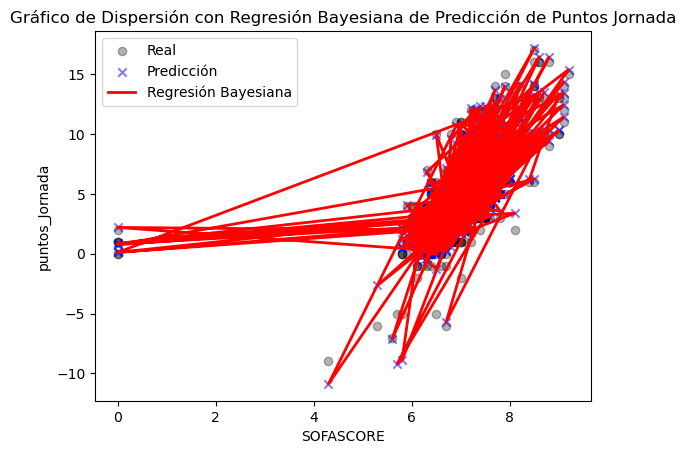

Ejemplo de prediccion:
14


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score

# Eliminar filas con valores nulos
df = df.dropna()

# Seleccionar los atributos con mayor correlación
selected_features = ['SOFASCORE', 'puntos_SOFASCORE', 'AS', 'puntos_AS', 'MD', 'puntos_MD', 'MARCA', 'puntos_MARCA', 'puntos_Goles']
X = df[selected_features]
y = df['puntos_Jornada']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear el modelo de Regresión Bayesiana
model = BayesianRidge()

# Realizar Cross-Validation para evaluar el rendimiento del modelo
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Calcular el error cuadrático medio medio del modelo
mse = -np.mean(scores)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio del modelo con los datos de prueba
mse_test = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)

# Imprimir el error cuadrático medio medio y el R2 del modelo
print('Error Cuadrático Medio Medio del modelo es:', mse)
print('Error Cuadrático Medio del modelo con los datos de prueba es:', mse_test)
print('Coeficiente de Determinación (R2) del modelo es:', r2)

# Generar el gráfico de dispersión con puntos de predicción
plt.scatter(X_test['SOFASCORE'], y_test, color='black', label='Real', alpha=0.3)
plt.scatter(X_test['SOFASCORE'], y_pred, color='blue', label='Predicción', marker='x', alpha=0.5)
plt.plot(X_test['SOFASCORE'], model.predict(X_test), color='red', linewidth=2, label='Regresión Bayesiana')
plt.xlabel('SOFASCORE')
plt.ylabel('puntos_Jornada')
plt.title('Gráfico de Dispersión con Regresión Bayesiana de Predicción de Puntos Jornada')
plt.legend()
plt.show()

# Convertir los datos de predicción a un DataFrame
datos = pd.DataFrame({'SOFASCORE': [8.4], 'puntos_SOFASCORE': [10], 'AS': [3], 'puntos_AS': [10], 'MD': [3], 'puntos_MD': [10], 'MARCA': [3], 'puntos_MARCA': [10], 'puntos_Goles': [4]})

print("Ejemplo de prediccion:")

def hacer_prediccion(datos):
    # Realizar predicciones usando el modelo entrenado
    predicciones = model.predict(datos)
    print(int(predicciones))

# Llamar a la función de predicción
hacer_prediccion(datos)

#  Análisis comparativo de todos los modelos en train y en validation

                Modelo  MSE_Entrenamiento  R2_Entrenamiento  MSE_Validación  \
0                  KNN           0.808581          0.910341        0.989369   
1     Regresión Lineal           1.177571          0.869425        1.188288   
2     Redes Neuronales           0.883841          0.901996        0.943428   
3    Árbol de Decisión           0.587042          0.934906        1.152376   
4  Regresión Bayesiana           1.177580          0.869424        1.188209   

   R2_Validación  
0       0.866887  
1       0.868401  
2       0.881184  
3       0.859531  
4       0.868413  


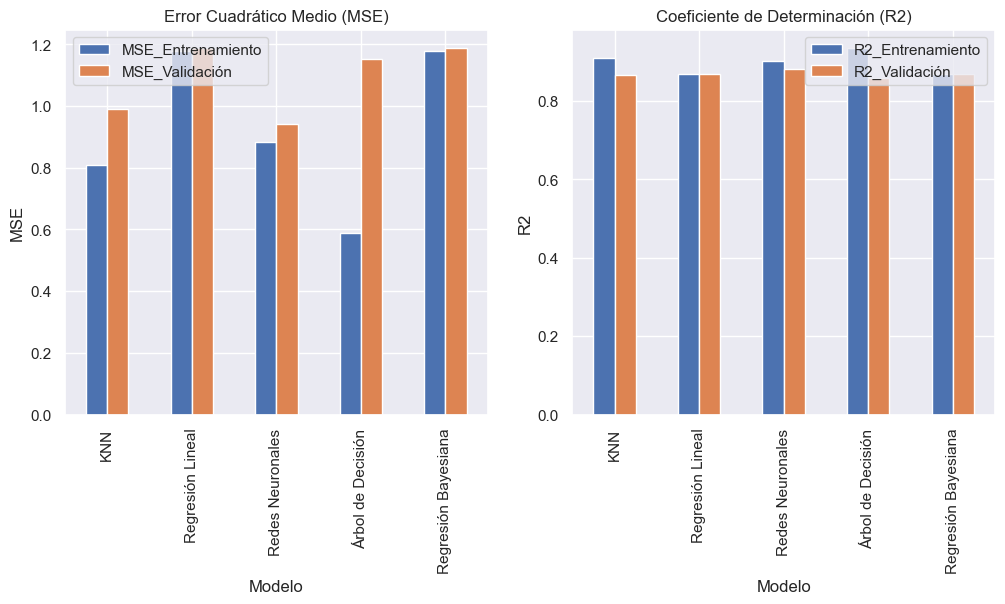

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Eliminar filas con valores nulos
df = df.dropna()

# Seleccionar los atributos con mayor correlación
selected_features = ['SOFASCORE', 'puntos_SOFASCORE', 'AS', 'puntos_AS', 'MD', 'puntos_MD', 'MARCA', 'puntos_MARCA']
X = df[selected_features]
y = df['puntos_Jornada']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Inicializar los modelos
knn_model = KNeighborsRegressor(n_neighbors=7)
linear_model = LinearRegression()
nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=0)
tree_model = DecisionTreeRegressor(random_state=0)
bayesian_model = BayesianRidge()

models = [knn_model, linear_model, nn_model, tree_model, bayesian_model]
model_names = ['KNN', 'Regresión Lineal', 'Redes Neuronales', 'Árbol de Decisión', 'Regresión Bayesiana']

train_mse = []
train_r2 = []
validation_mse = []
validation_r2 = []

for model, name in zip(models, model_names):
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predicciones en entrenamiento
    y_train_pred = model.predict(X_train)
    
    # Métricas en entrenamiento
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    train_r2.append(r2_score(y_train, y_train_pred))
    
    # Cross-Validation para evaluación en validación
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    validation_mse.append(-np.mean(scores))
    
    # Predicciones en validación
    y_validation_pred = model.predict(X_test)
    
    # Métricas en validación
    validation_r2.append(r2_score(y_test, y_validation_pred))

# Crear un DataFrame para el análisis comparativo
results_df = pd.DataFrame({
    'Modelo': model_names,
    'MSE_Entrenamiento': train_mse,
    'R2_Entrenamiento': train_r2,
    'MSE_Validación': validation_mse,
    'R2_Validación': validation_r2
})

# Imprimir el DataFrame
print(results_df)

# Visualizar los resultados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de Barras para MSE
results_df.plot(x='Modelo', y=['MSE_Entrenamiento', 'MSE_Validación'], kind='bar', ax=ax1, title='Error Cuadrático Medio (MSE)')
ax1.set_ylabel('MSE')

# Gráfico de Barras para R2
results_df.plot(x='Modelo', y=['R2_Entrenamiento', 'R2_Validación'], kind='bar', ax=ax2, title='Coeficiente de Determinación (R2)')
ax2.set_ylabel('R2')

plt.show()


                Modelo  MSE_Entrenamiento  R2_Entrenamiento  MSE_Validación  \
0                  KNN           0.146691          0.983734        0.232744   
1     Regresión Lineal           0.303726          0.966321        0.309915   
2     Redes Neuronales           0.198964          0.977938        0.198409   
3    Árbol de Decisión           0.079151          0.991223        0.234267   
4  Regresión Bayesiana           0.303726          0.966321        0.309899   

   R2_Validación  
0       0.966831  
1       0.960999  
2       0.966886  
3       0.977915  
4       0.960999  


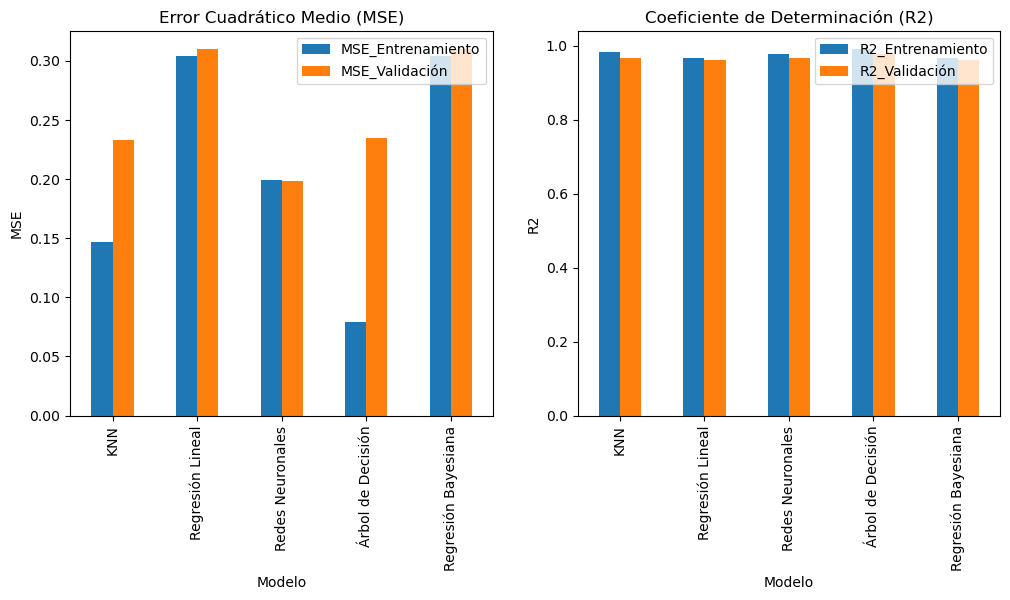

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Eliminar filas con valores nulos
df = df.dropna()

# Seleccionar los atributos con mayor correlación
selected_features = ['SOFASCORE', 'puntos_SOFASCORE', 'AS', 'puntos_AS', 'MD', 'puntos_MD', 'MARCA', 'puntos_MARCA', 'puntos_Goles']
X = df[selected_features]
y = df['puntos_Jornada']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Inicializar los modelos
knn_model = KNeighborsRegressor(n_neighbors=4)
linear_model = LinearRegression()
nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=0)
tree_model = DecisionTreeRegressor(random_state=0)
bayesian_model = BayesianRidge()

models = [knn_model, linear_model, nn_model, tree_model, bayesian_model]
model_names = ['KNN', 'Regresión Lineal', 'Redes Neuronales', 'Árbol de Decisión', 'Regresión Bayesiana']

train_mse = []
train_r2 = []
validation_mse = []
validation_r2 = []

for model, name in zip(models, model_names):
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predicciones en entrenamiento
    y_train_pred = model.predict(X_train)
    
    # Métricas en entrenamiento
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    train_r2.append(r2_score(y_train, y_train_pred))
    
    # Cross-Validation para evaluación en validación
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    validation_mse.append(-np.mean(scores))
    
    # Predicciones en validación
    y_validation_pred = model.predict(X_test)
    
    # Métricas en validación
    validation_r2.append(r2_score(y_test, y_validation_pred))

# Crear un DataFrame para el análisis comparativo
results_df = pd.DataFrame({
    'Modelo': model_names,
    'MSE_Entrenamiento': train_mse,
    'R2_Entrenamiento': train_r2,
    'MSE_Validación': validation_mse,
    'R2_Validación': validation_r2
})

# Imprimir el DataFrame
print(results_df)

# Visualizar los resultados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de Barras para MSE
results_df.plot(x='Modelo', y=['MSE_Entrenamiento', 'MSE_Validación'], kind='bar', ax=ax1, title='Error Cuadrático Medio (MSE)')
ax1.set_ylabel('MSE')

# Gráfico de Barras para R2
results_df.plot(x='Modelo', y=['R2_Entrenamiento', 'R2_Validación'], kind='bar', ax=ax2, title='Coeficiente de Determinación (R2)')
ax2.set_ylabel('R2')

plt.show()

# Mario esto es el codigo para el este

In [ ]:
# Cargar el dataset desde un archivo CSV
df = pd.read_csv('./jugadoresFantasyActualizado.csv')

In [ ]:
# Eliminar la columna 'Name'
df = df.drop(columns=['Name', 'Team', 'Jornada'])a

# Convertir la columna 'Status' a un formato numérico
df['posicion'] = df['posicion'].astype('category').cat.codes

# Convertir la columna 'Status' a un formato numérico
df['status'] = df['status'].astype('category').cat.codes

# Modelo KNN

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib  # Importar la biblioteca joblib

# Eliminar filas con valores nulos
df = df.dropna()

# Seleccionar los atributos con mayor correlación
selected_features = ['SOFASCORE', 'puntos_SOFASCORE', 'AS', 'puntos_AS', 'MD', 'puntos_MD', 'MARCA', 'puntos_MARCA', 'puntos_Goles']
X = df[selected_features]
y = df['puntos_Jornada']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear el modelo KNN para regresión
knn_model = KNeighborsRegressor(n_neighbors=4)  # Puedes ajustar el número de vecinos según sea necesario

# Realizar Cross-Validation para evaluar el rendimiento del modelo
scores = cross_val_score(knn_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Calcular el error cuadrático medio medio del modelo
mse = -np.mean(scores)

# Entrenar el modelo con los datos de entrenamiento
knn_model.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred = knn_model.predict(X_test)

# Calcular el error cuadrático medio del modelo con los datos de prueba
mse_test = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)

# Guardar el modelo en un archivo
model_filename = 'modelo_knn.joblib'
joblib.dump(knn_model, model_filename)
print(f'Modelo guardado como {model_filename}')

Modelo guardado como modelo_knn.joblib


In [12]:
# Cargar el modelo desde el archivo
loaded_model = joblib.load('modelo_knn.joblib')

nuevos_datos = pd.DataFrame({'SOFASCORE': [7.9], 'puntos_SOFASCORE': [9], 'AS': [1], 'puntos_AS': [2], 'MD': [1], 'puntos_MD': [2], 'MARCA': [1], 'puntos_MARCA': [2], 'puntos_Goles': [0]})

# Realizar predicciones con los datos de prueba (o cualquier otro conjunto de datos)
nuevas_predicciones = loaded_model.predict(nuevos_datos)
print(int(nuevas_predicciones))

4


# Modelo Redes neuronales

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Eliminar filas con valores nulos
df = df.dropna()

# Seleccionar los atributos con mayor correlación
selected_features = ['SOFASCORE', 'puntos_SOFASCORE', 'AS', 'puntos_AS', 'MD', 'puntos_MD', 'MARCA', 'puntos_MARCA', 'puntos_Goles']
X = df[selected_features]
y = df['puntos_Jornada']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear el modelo de Red Neuronal
# Puedes ajustar los parámetros según sea necesario
model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=0)

# Realizar Cross-Validation para evaluar el rendimiento del modelo
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Calcular el error cuadrático medio medio del modelo
mse = -np.mean(scores)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio del modelo con los datos de prueba
mse_test = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)

# Guardar el modelo en un archivo
model_filename = 'modelo_RedesNeuronales.joblib'
joblib.dump(model, model_filename)
print(f'Modelo guardado como {model_filename}')

In [ ]:
# Cargar el modelo desde el archivo
loaded_model = joblib.load('modelo_RedesNeuronales.joblib')

nuevos_datos = pd.DataFrame({'SOFASCORE': [7.9], 'puntos_SOFASCORE': [9], 'AS': [1], 'puntos_AS': [2], 'MD': [1], 'puntos_MD': [2], 'MARCA': [1], 'puntos_MARCA': [2], 'puntos_Goles': [0]})

# Realizar predicciones con los datos de prueba (o cualquier otro conjunto de datos)
nuevas_predicciones = loaded_model.predict(nuevos_datos)
print(int(nuevas_predicciones))

# Arbol de decision

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Eliminar filas con valores nulos
df = df.dropna()

# Seleccionar los atributos con mayor correlación
selected_features = ['SOFASCORE', 'puntos_SOFASCORE', 'AS', 'puntos_AS', 'MD', 'puntos_MD', 'MARCA', 'puntos_MARCA', 'puntos_Goles']
X = df[selected_features]
y = df['puntos_Jornada']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear el modelo de árbol de decisión para regresión
tree_model = DecisionTreeRegressor(random_state=0)

# Realizar Cross-Validation para evaluar el rendimiento del modelo
scores = cross_val_score(tree_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Calcular el error cuadrático medio medio del modelo
mse = -np.mean(scores)

# Entrenar el modelo con los datos de entrenamiento
tree_model.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred = tree_model.predict(X_test)

# Calcular el error cuadrático medio del modelo con los datos de prueba
mse_test = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)

# Guardar el modelo en un archivo
model_filename = 'modelo_ArbolDeDecisiones.joblib'
joblib.dump(tree_model, model_filename)
print(f'Modelo guardado como {model_filename}')

In [ ]:
# Cargar el modelo desde el archivo
loaded_model = joblib.load('modelo_ArbolDeDecisiones.joblib')

nuevos_datos = pd.DataFrame({'SOFASCORE': [7.9], 'puntos_SOFASCORE': [9], 'AS': [1], 'puntos_AS': [2], 'MD': [1], 'puntos_MD': [2], 'MARCA': [1], 'puntos_MARCA': [2], 'puntos_Goles': [0]})

# Realizar predicciones con los datos de prueba (o cualquier otro conjunto de datos)
nuevas_predicciones = loaded_model.predict(nuevos_datos)
print(int(nuevas_predicciones))